In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv", encoding='ISO-8859-1')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<Axes: ylabel='Count'>

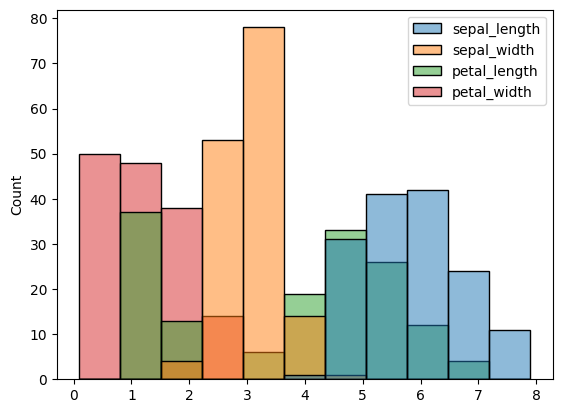

In [11]:
sns.histplot(df)

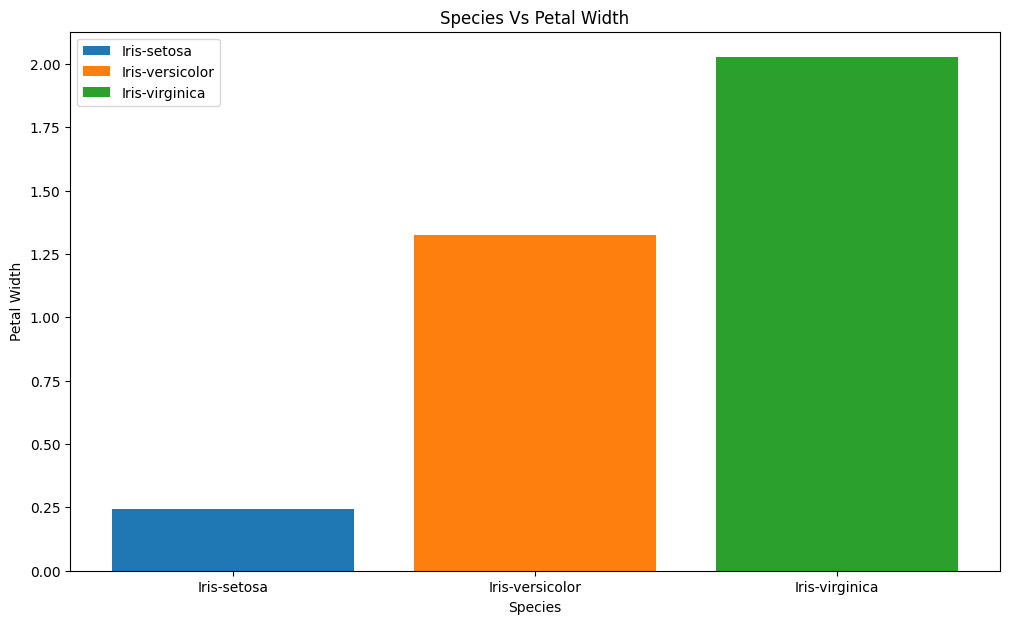

In [12]:
plt.figure(figsize=(12, 7))
plt.title("Species Vs Petal Width")
species = df['species']
petal_width = df['petal_width']
species_categories = species.unique()

for i, species_category in enumerate(species_categories):
    species_data = petal_width[species == species_category]
    plt.bar(i, species_data.mean(), label=species_category)

plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.xticks(range(len(species_categories)), species_categories)
plt.legend()

plt.show()


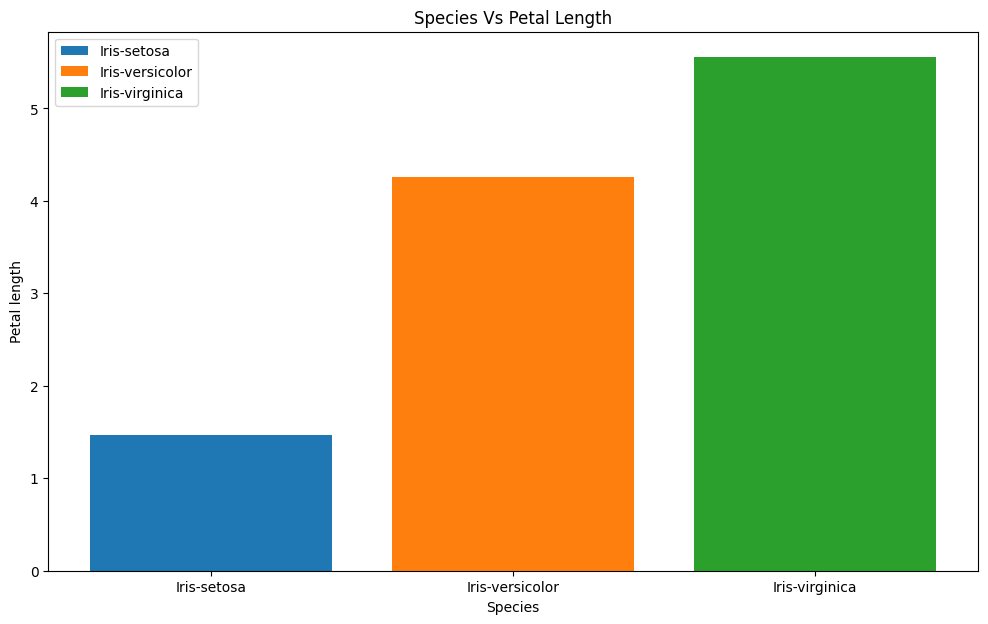

In [13]:
plt.figure(figsize=(12, 7))
plt.title("Species Vs Petal Length")
species = df['species']
petal_length = df['petal_length']
species_categories = species.unique()

for i, species_category in enumerate(species_categories):
    species_data = petal_length[species == species_category]
    plt.bar(i, species_data.mean(), label=species_category)

plt.xlabel('Species')
plt.ylabel('Petal length')
plt.xticks(range(len(species_categories)), species_categories)
plt.legend()

plt.show()


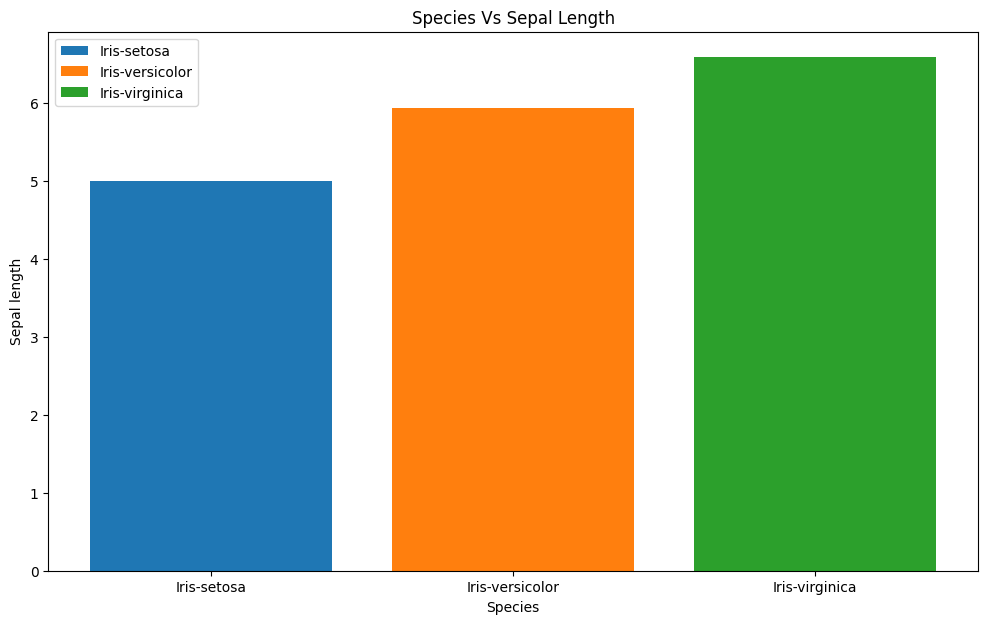

In [14]:
plt.figure(figsize=(12, 7))
plt.title("Species Vs Sepal Length")
species = df['species']
sepal_length = df['sepal_length']
species_categories = species.unique()

for i, species_category in enumerate(species_categories):
    species_data = sepal_length[species == species_category]
    plt.bar(i, species_data.mean(), label=species_category)

plt.xlabel('Species')
plt.ylabel('Sepal length')
plt.xticks(range(len(species_categories)), species_categories)
plt.legend()

plt.show()


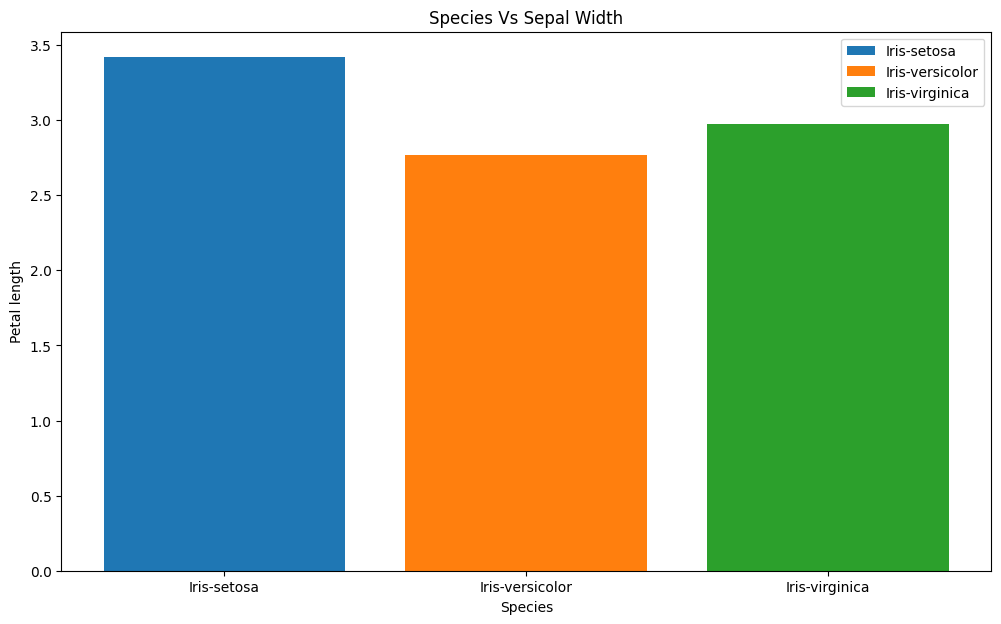

In [15]:
plt.figure(figsize=(12, 7))
plt.title("Species Vs Sepal Width")
species = df['species']
sepal_width = df['sepal_width']
species_categories = species.unique()

for i, species_category in enumerate(species_categories):
    species_data = sepal_width[species == species_category]
    plt.bar(i, species_data.mean(), label=species_category)

plt.xlabel('Species')
plt.ylabel('Petal length')
plt.xticks(range(len(species_categories)), species_categories)
plt.legend()

plt.show()


In [16]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
k = 10  # You can choose a different value for k
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)


Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



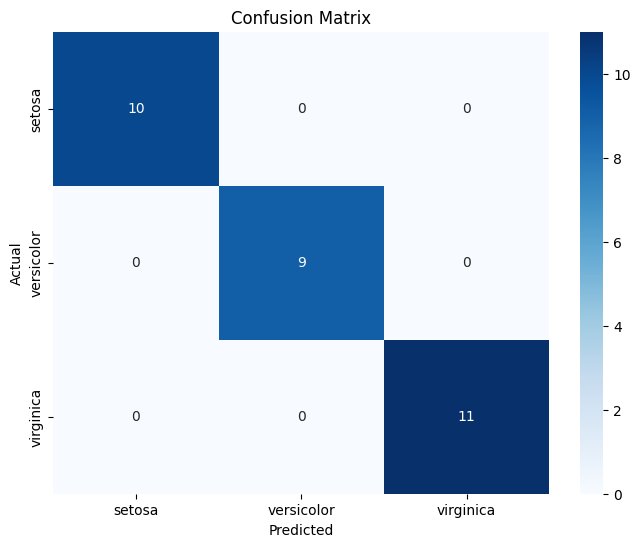

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

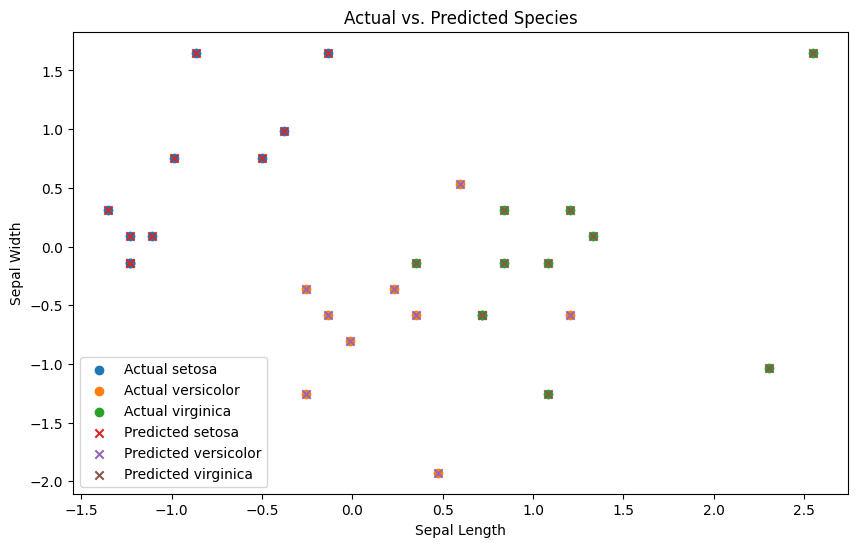

In [23]:
plt.figure(figsize=(10, 6))
for species in np.unique(y_test):
    indices = np.where(y_test == species)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], label=f'Actual {iris.target_names[species]}')

for species in np.unique(y_pred):
    indices = np.where(y_pred == species)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], marker='x', label=f'Predicted {iris.target_names[species]}')

plt.title('Actual vs. Predicted Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()
